In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn.model_selection as skm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,ElasticNetCV,ElasticNet,Lasso,Ridge,LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [28]:
from ISLP import load_data , confusion_table
from ISLP.models import ModelSpec as MS
from ISLP.bart import BART
import warnings

In [29]:
from statsmodels.datasets import get_rdataset
from sklearn.tree import (DecisionTreeClassifier, DecisionTreeRegressor ,plot_tree ,export_text)
from sklearn.metrics import (accuracy_score ,log_loss)
from sklearn.ensemble import (RandomForestRegressor ,GradientBoostingRegressor,
                        RandomForestClassifier, GradientBoostingClassifier )
from sklearn.cross_decomposition import PLSRegression
from pygam import ( s as s_gam,l as l_gam,f as f_gam,LinearGAM,LogisticGAM)
from pygam import GAM

# Question 7

## Random Forest

In [4]:
Boston=load_data('Boston')
Boston[:2]

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6

In [5]:
y=Boston['medv']
X=Boston.drop('medv',axis=1)

In [6]:
X_train,X_test,y_train,y_test=skm.train_test_split(X,y,test_size=0.2)

In [7]:
y_train_categorised=pd.cut(y_train,10)
y_test_categorised=pd.cut(y_test,10)
y_test_categorised.cat.codes

172    3
255    3
436    0
134    1
386    0
      ..
155    1
184    4
188    5
354    2
236    4
Length: 102, dtype: int8

In [8]:
X_test

crim    zn  indus  chas    nox     rm    age      dis  rad  tax  \
172   0.13914   0.0   4.05     0  0.510  5.572   88.5   2.5961    5  296   
255   0.03548  80.0   3.64     0  0.392  5.876   19.1   9.2203    1  315   
436  14.42080   0.0  18.10     0  0.740  6.461   93.3   2.0026   24  666   
134   0.97617   0.0  21.89     0  0.624  5.757   98.4   2.3460    4  437   
386  24.39380   0.0  18.10     0  0.700  4.652  100.0   1.4672   24  666   
..        ...   ...    ...   ...    ...    ...    ...      ...  ...  ...   
155   3.53501   0.0  19.58     1  0.871  6.152   82.6   1.7455    5  403   
184   0.08308   0.0   2.46     0  0.488  5.604   89.8   2.9879    3  193   
188   0.12579  45.0   3.44     0  0.437  6.556   29.1   4.5667    5  398   
354   0.04301  80.0   1.91     0  0.413  5.663   21.9  10.5857    4  334   
236   0.52058   0.0   6.20     1  0.507  6.631   76.5   4.1480    8  307   

     ptratio  lstat  
172     16.6  14.69  
255     16.4   9.25  
436     20.2  18.05  
134     21.2  17.31  
386     20.2  28.28  
..       ...    ...  
155     14.7  15.02  
184     17.8  13.98  
188     15.2   4.56  
354     22.0   8.05  
236     17.4   9.54  

[102 rows x 12 columns]

In [167]:
import math
rfc=RandomForestClassifier(n_estimators=1500,max_features=6).fit(X_train,y_train_categorised.cat.codes)
pred=rfc.predict(X_test)
# math.ceil(pred)
# np.ceil(pred)
accuracy_score(y_test_categorised.cat.codes,pred)

0.5490196078431373

<Axes: >

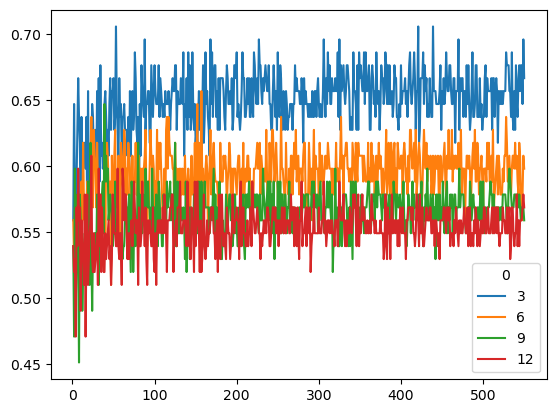

In [73]:
pd.DataFrame(cl_er).set_index(0).T.plot()

In [9]:
MSE=[]
for predictors in [4,6,12]:
    mse=[predictors]
    print(predictors)
    for n_estimator in range(1,551):
# n_estimator=100;predictors=6
        rfr=RandomForestRegressor(n_estimators=n_estimator,max_features=predictors)
        rfr.fit(X_train,y_train)
        pred=rfr.predict(X_test)
        Mse=np.mean((pred-y_test)**2)
        mse.append(Mse)
    MSE.append(mse)

4
6
12


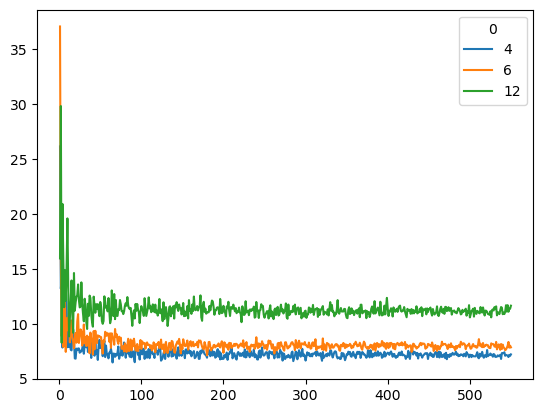

In [16]:
pd.DataFrame(MSE,).set_index(0).T.plot();

# Question 8

In [168]:
Carseats=load_data('Carseats')
Carseats=pd.get_dummies(Carseats)
Carseats[:2]

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0           True           False             False     False       True   
1          False            True             False     False       True   

   US_No  US_Yes  
0  False    True  
1  False    True

In [169]:
Carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   ShelveLoc_Bad     400 non-null    bool   
 9   ShelveLoc_Good    400 non-null    bool   
 10  ShelveLoc_Medium  400 non-null    bool   
 11  Urban_No          400 non-null    bool   
 12  Urban_Yes         400 non-null    bool   
 13  US_No             400 non-null    bool   
 14  US_Yes            400 non-null    bool   
dtypes: bool(7), float64(1), int64(7)
memory usage: 27.9 KB


In [170]:
y=Carseats['Sales']
X=Carseats.drop('Sales',axis=1)

In [171]:
X_train,X_test,y_train,y_test=skm.train_test_split(X,y,test_size=0.2)

## B (Regression Tree)

MSE = 4.907371071721088


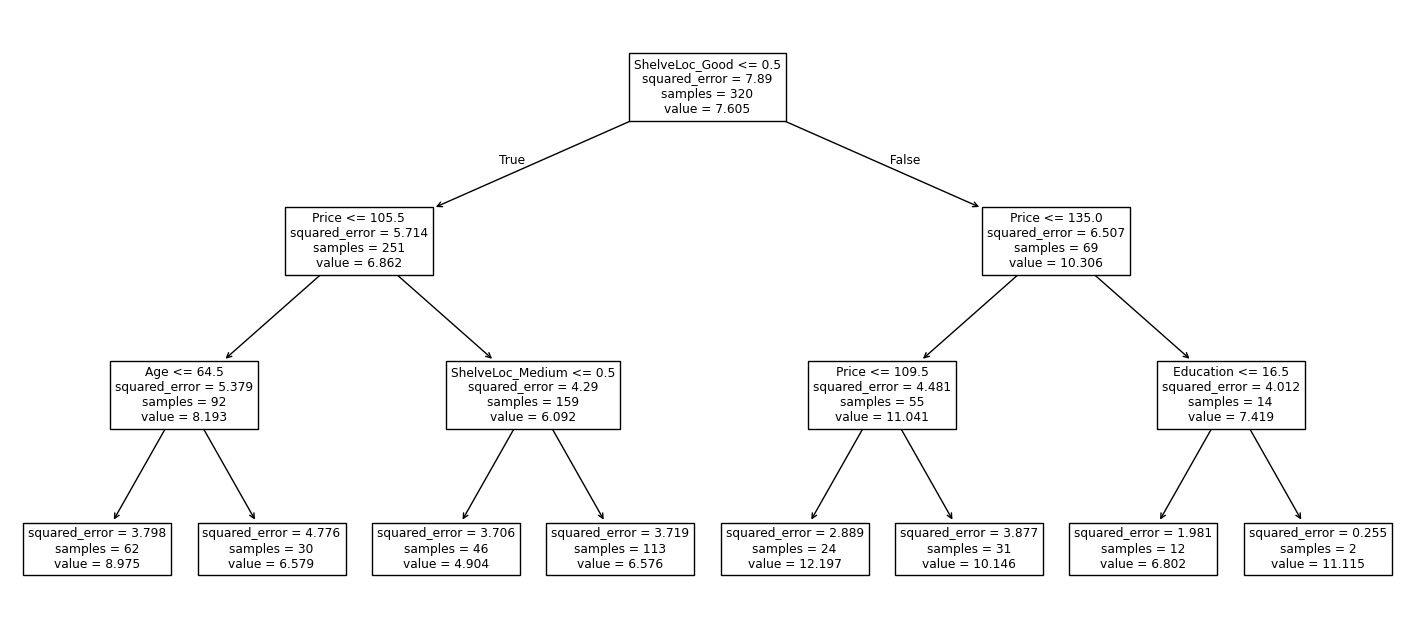

In [172]:
dtr=DecisionTreeRegressor(max_depth=3)
dtr.fit(X_train,y_train)
print(f'MSE = {np.mean((y_test-dtr.predict(X_test))**2)}')
plt.figure(figsize=(18,8))
plot_tree(dtr,feature_names=X_train.columns);

In [173]:
print(export_text(dtr,feature_names=X_train.columns))

|--- ShelveLoc_Good <= 0.50
|   |--- Price <= 105.50
|   |   |--- Age <= 64.50
|   |   |   |--- value: [8.97]
|   |   |--- Age >  64.50
|   |   |   |--- value: [6.58]
|   |--- Price >  105.50
|   |   |--- ShelveLoc_Medium <= 0.50
|   |   |   |--- value: [4.90]
|   |   |--- ShelveLoc_Medium >  0.50
|   |   |   |--- value: [6.58]
|--- ShelveLoc_Good >  0.50
|   |--- Price <= 135.00
|   |   |--- Price <= 109.50
|   |   |   |--- value: [12.20]
|   |   |--- Price >  109.50
|   |   |   |--- value: [10.15]
|   |--- Price >  135.00
|   |   |--- Education <= 16.50
|   |   |   |--- value: [6.80]
|   |   |--- Education >  16.50
|   |   |   |--- value: [11.11]



## C (Pruning)

In [174]:
''' GridSearch to determine optimum depth'''
kfold=skm.KFold(10,shuffle=True,random_state=0)
param_grid={'max_depth': range(1,len(X_train.columns)+1)}
grid = skm.GridSearchCV(dtr ,param_grid ,refit=True ,cv=kfold ,scoring='neg_mean_squared_error')
grid.fit(X_train , y_train)
grid.best_score_,grid.best_params_

(-4.686043233334296, {'max_depth': 7})

In [175]:
'''GridSearchCV to determine optimum "alpha" for tree pruning'''
ccp_path=dtr.cost_complexity_pruning_path(X_train,y_train)
param_grid={'ccp_alpha':ccp_path.ccp_alphas}
kfold=skm.KFold(10,shuffle=True,random_state=0)
grid = skm.GridSearchCV(dtr ,param_grid ,refit=True ,cv=kfold ,scoring='neg_mean_squared_error')
grid.fit(X_train , y_train)
grid.best_score_,grid.best_params_

(-5.179944386334663, {'ccp_alpha': 0.17780025855327464})

## D (bagging)

MSE = 2.90062386665001


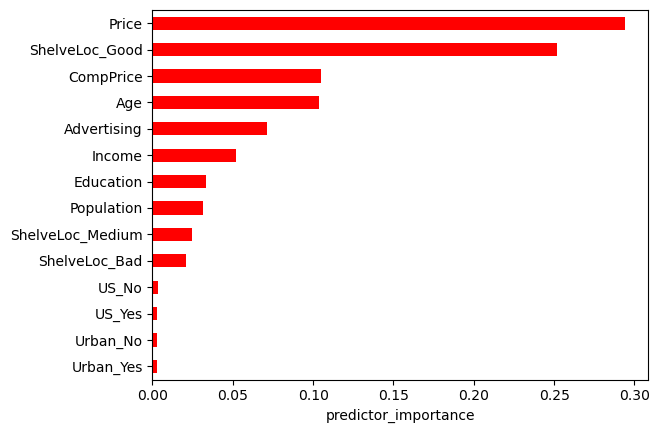

In [176]:
rfr=RandomForestRegressor(n_estimators=500,max_features=len(X_train.columns))
rfr.fit(X_train,y_train)
print(f'MSE = {np.mean((y_test-rfr.predict(X_test))**2)}')
pd.DataFrame(data=rfr.feature_importances_,index=X_train.columns).sort_values(by=0).plot(
    kind='barh',color='red',xlabel='predictor_importance',legend=False);

## E (Random Forest)

In [177]:
len(X_train.columns)

14

for m = 14, MSE = 2.8293904365700118
for m = 7, MSE = 2.985619869785006
for m = 4, MSE = 3.21484640848501


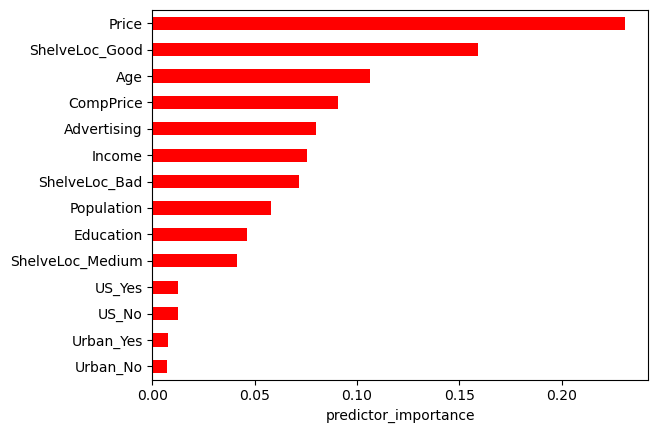

In [187]:
for m in [14,7,4]:
    rfr=RandomForestRegressor(n_estimators=500,max_features=m)
    rfr.fit(X_train,y_train)
    print(f'for m = {m}, MSE = {np.mean((y_test-rfr.predict(X_test))**2)}')
pd.DataFrame(data=rfr.feature_importances_,index=X_train.columns).sort_values(by=0).plot(
    kind='barh',color='red',xlabel='predictor_importance',legend=False);

## F (BART)

In [197]:
X_train=X_train.astype(float)
X_train

CompPrice  Income  Advertising  Population  Price   Age  Education  \
399      134.0    37.0          0.0        27.0  120.0  49.0       16.0   
273      116.0   106.0          8.0       244.0   86.0  58.0       12.0   
1        111.0    48.0         16.0       260.0   83.0  65.0       10.0   
59       118.0    71.0          4.0       148.0  114.0  80.0       13.0   
384      123.0    37.0         15.0       348.0  112.0  28.0       12.0   
..         ...     ...          ...         ...    ...   ...        ...   
129      143.0   120.0          7.0       279.0  147.0  40.0       10.0   
84       111.0    25.0          0.0        52.0  121.0  43.0       18.0   
343      117.0    42.0         10.0       371.0  121.0  26.0       14.0   
149      121.0   120.0         13.0       140.0   87.0  56.0       11.0   
330      122.0    59.0          0.0       501.0  112.0  32.0       14.0   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
399            0.0             1.0               0.0       0.0        1.0   
273            0.0             0.0               1.0       0.0        1.0   
1              0.0             1.0               0.0       0.0        1.0   
59             0.0             0.0               1.0       0.0        1.0   
384            0.0             1.0               0.0       0.0        1.0   
..             ...             ...               ...       ...        ...   
129            1.0             0.0               0.0       1.0        0.0   
84             1.0             0.0               0.0       1.0        0.0   
343            1.0             0.0               0.0       0.0        1.0   
149            0.0             0.0               1.0       0.0        1.0   
330            1.0             0.0               0.0       1.0        0.0   

     US_No  US_Yes  
399    0.0     1.0  
273    0.0     1.0  
1      0.0     1.0  
59     1.0     0.0  
384    0.0     1.0  
..     ...     ...  
129    0.0     1.0  
84     1.0     0.0  
343    0.0     1.0  
149    0.0     1.0  
330    1.0     0.0  

[320 rows x 14 columns]

In [196]:
bart=BART(random_state=0,burnin=10,ndraw=15).fit(X_train,np.asarray(y_train))

In [200]:
X_test=X_test.astype(float)
pred=bart.predict(X_test)
print(f'MSE = {np.mean((y_test-pred)**2)}')

MSE = 1.5287424719408143


# Question 9

In [17]:
OJ=load_data('OJ')
OJ[:2]

Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0       CH             237        1     1.75     1.99     0.0     0.0   
1       CH             239        1     1.75     1.99     0.0     0.3   

   SpecialCH  SpecialMM  LoyalCH  SalePriceMM  SalePriceCH  PriceDiff Store7  \
0          0          0      0.5         1.99         1.75       0.24     No   
1          0          1      0.6         1.69         1.75      -0.06     No   

   PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0   0.000000        0.0           0.24      1  
1   0.150754        0.0           0.24      1

In [18]:
X=pd.get_dummies(OJ.drop('Purchase',axis=1)).astype(float)
y=OJ['Purchase']

In [19]:
X[:2]

WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  SpecialCH  \
0           237.0      1.0     1.75     1.99     0.0     0.0        0.0   
1           239.0      1.0     1.75     1.99     0.0     0.3        0.0   

   SpecialMM  LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  PctDiscMM  \
0        0.0      0.5         1.99         1.75       0.24   0.000000   
1        1.0      0.6         1.69         1.75      -0.06   0.150754   

   PctDiscCH  ListPriceDiff  STORE  Store7_No  Store7_Yes  
0        0.0           0.24    1.0        1.0         0.0  
1        0.0           0.24    1.0        1.0         0.0

In [236]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WeekofPurchase  1070 non-null   float64
 1   StoreID         1070 non-null   float64
 2   PriceCH         1070 non-null   float64
 3   PriceMM         1070 non-null   float64
 4   DiscCH          1070 non-null   float64
 5   DiscMM          1070 non-null   float64
 6   SpecialCH       1070 non-null   float64
 7   SpecialMM       1070 non-null   float64
 8   LoyalCH         1070 non-null   float64
 9   SalePriceMM     1070 non-null   float64
 10  SalePriceCH     1070 non-null   float64
 11  PriceDiff       1070 non-null   float64
 12  PctDiscMM       1070 non-null   float64
 13  PctDiscCH       1070 non-null   float64
 14  ListPriceDiff   1070 non-null   float64
 15  STORE           1070 non-null   float64
 16  Store7_No       1070 non-null   float64
 17  Store7_Yes      1070 non-null   f

In [20]:
X_train,X_test,y_train,y_test=skm.train_test_split(X,y,test_size=0.2,random_state=0)

## A-E (Regression Tree)

In [41]:
dtc=DecisionTreeClassifier().fit(X_train,y_train)
classification_error=1-accuracy_score(y_train,dtc.predict(X_train))
print(f'classification_error (training) = {classification_error}')
classification_error=1-accuracy_score(y_test,dtc.predict(X_test))
print(f'classification_error (testing) = {classification_error}')

classification_error (training) = 0.010514018691588745
classification_error (testing) = 0.2429906542056075


In [261]:
dtc.get_n_leaves()

178

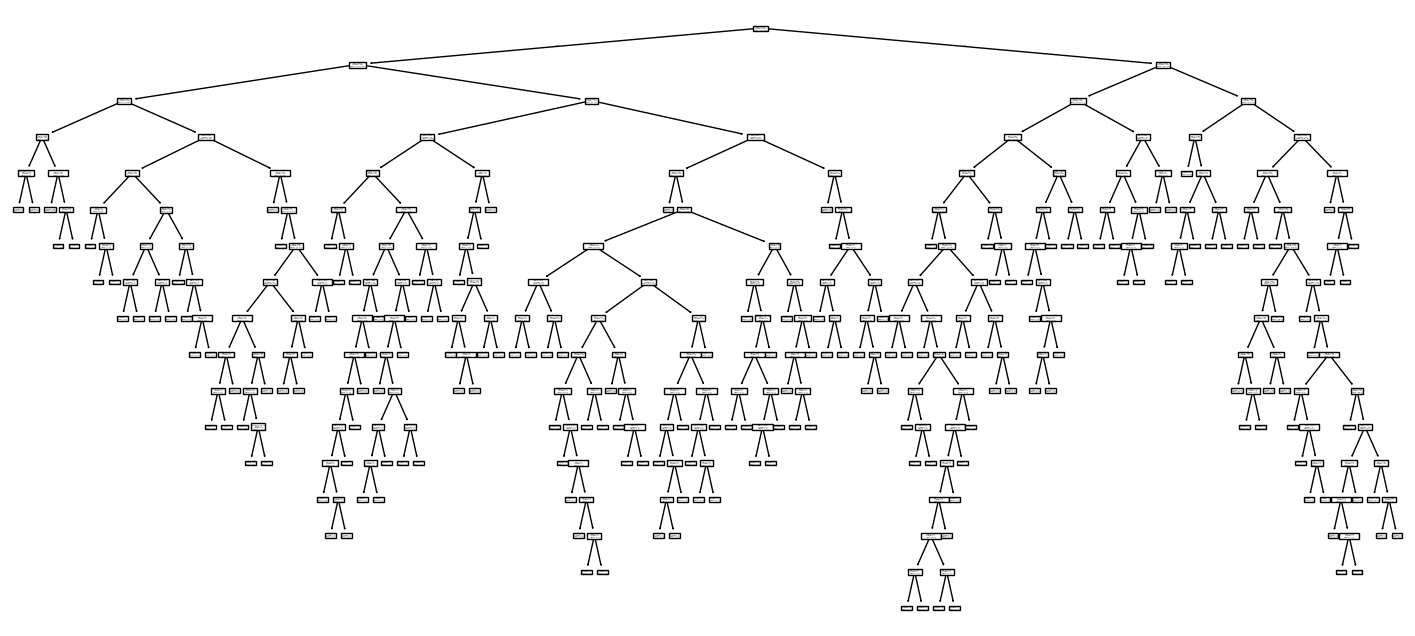

In [253]:
plt.figure(figsize=(18,8))
plot_tree(dtc,feature_names=X_train.columns);

In [240]:
dtc=DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train)
classification_error=1-accuracy_score(y_train,dtc.predict(X_train))
print(f'classification_error = {classification_error}')

classification_error = 0.010514018691588745


In [262]:
dtc=DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
classification_error=1-accuracy_score(y_train,dtc.predict(X_train))
print(f'classification_error = {classification_error}')

classification_error = 0.17873831775700932


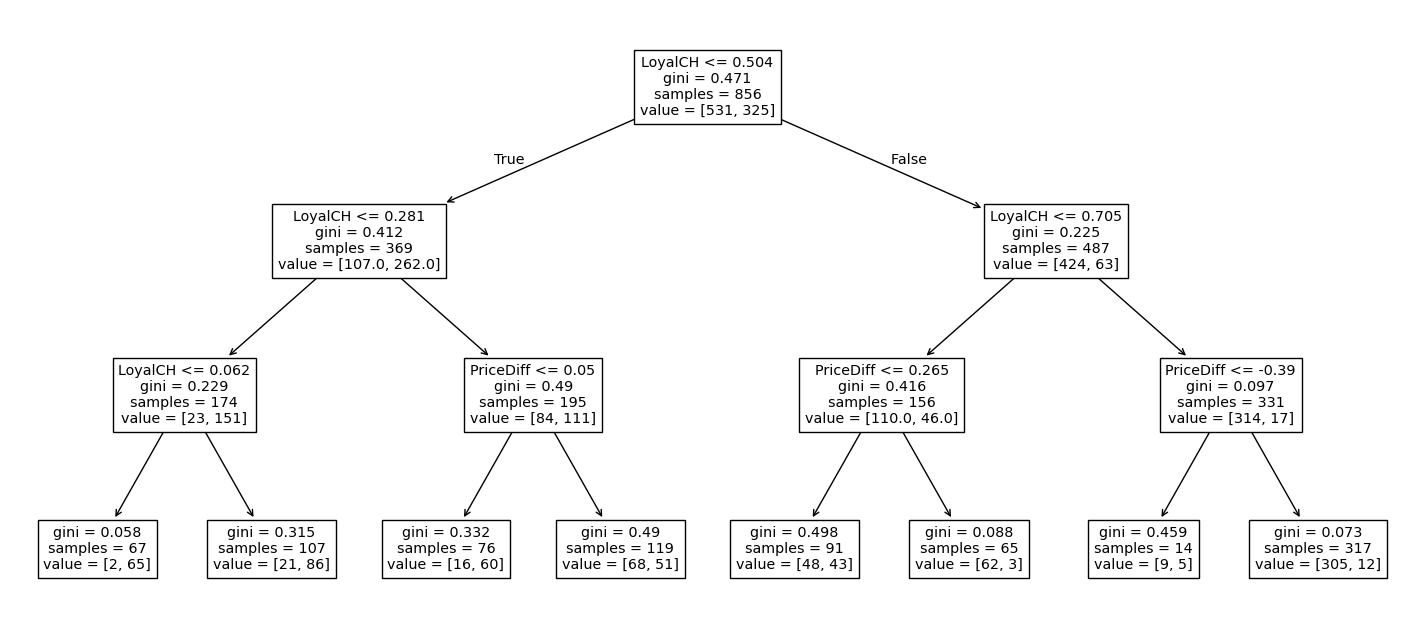

In [249]:
plt.figure(figsize=(18,8))
plot_tree(dtc,feature_names=X_train.columns);

In [267]:
classification_error=1-accuracy_score(y_test,dtc.predict(X_test))
print(f'classification_error = {classification_error}')

classification_error = 0.17757009345794394


In [264]:
print(export_text(dtc,feature_names=X_train.columns))

|--- LoyalCH <= 0.50
|   |--- LoyalCH <= 0.28
|   |   |--- LoyalCH <= 0.06
|   |   |   |--- class: MM
|   |   |--- LoyalCH >  0.06
|   |   |   |--- class: MM
|   |--- LoyalCH >  0.28
|   |   |--- PriceDiff <= 0.05
|   |   |   |--- class: MM
|   |   |--- PriceDiff >  0.05
|   |   |   |--- class: CH
|--- LoyalCH >  0.50
|   |--- LoyalCH <= 0.71
|   |   |--- PriceDiff <= 0.27
|   |   |   |--- class: CH
|   |   |--- PriceDiff >  0.27
|   |   |   |--- class: CH
|   |--- LoyalCH >  0.71
|   |   |--- PriceDiff <= -0.39
|   |   |   |--- class: CH
|   |   |--- PriceDiff >  -0.39
|   |   |   |--- class: CH



In [266]:
confusion_table(dtc.predict(X_test),y_test)

Truth       CH  MM
Predicted         
CH         112  28
MM          10  64

## F

In [21]:
def cls_error(estimator,X,y):
    return -(1-accuracy_score(estimator.predict(X),y))
kfold=skm.KFold(10,shuffle=True)
dtc=DecisionTreeClassifier()
param_grid={'max_depth':range(1,179)}
grid=skm.GridSearchCV(dtc,param_grid,refit=True,scoring=cls_error)
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 179)},
             scoring=<function cls_error at 0x0000022F774EB6A0>)

In [22]:
grid.cv_results_,grid.best_params_,grid.best_score_

({'mean_fit_time': array([0.01380568, 0.00625005, 0.01067863, 0.00755501, 0.003125  ,
         0.01379795, 0.01380181, 0.01693654, 0.01692657, 0.01562462,
         0.01693048, 0.01067672, 0.01249895, 0.01067972, 0.01692753,
         0.01188359, 0.01076417, 0.01380467, 0.01692982, 0.01249948,
         0.01380119, 0.00624962, 0.01823559, 0.01380143, 0.01874952,
         0.01611948, 0.01815953, 0.01450162, 0.01562648, 0.01562757,
         0.0169291 , 0.01249948, 0.01249938, 0.00937433, 0.00937533,
         0.00624971, 0.006249  , 0.00130272, 0.00937672, 0.00312428,
         0.00624948, 0.00625067, 0.01250029, 0.01692934, 0.01380134,
         0.0169291 , 0.01692939, 0.01380286, 0.01250162, 0.01380467,
         0.01692667, 0.0156261 , 0.00937672, 0.01067605, 0.01875329,
         0.01692581, 0.01692605, 0.01692786, 0.02005391, 0.01380382,
         0.01692863, 0.0138031 , 0.0138011 , 0.01562634, 0.01380377,
         0.01067934, 0.01249952, 0.01380434, 0.01562605, 0.01562657,
         0.016926

In [23]:
grid.cv_results_['mean_test_score']

array([-0.20092479, -0.20326397, -0.19389365, -0.17989256, -0.20442676,
       -0.21728546, -0.23132735, -0.21846865, -0.22200462, -0.22900857,
       -0.2371957 , -0.23251054, -0.22783218, -0.22199782, -0.22900857,
       -0.22199102, -0.22783898, -0.22783898, -0.2255066 , -0.22784578,
       -0.2255066 , -0.22432341, -0.22667619, -0.23017136, -0.23017136,
       -0.23134775, -0.22900177, -0.23017816, -0.22434381, -0.22317421,
       -0.23134775, -0.23018496, -0.22785258, -0.22900177, -0.22666939,
       -0.23485652, -0.2254998 , -0.22784578, -0.22783218, -0.22782538,
       -0.21965184, -0.22433701, -0.2255134 , -0.22900857, -0.2255134 ,
       -0.22666259, -0.22665579, -0.22784578, -0.22316741, -0.2254998 ,
       -0.22199782, -0.23251054, -0.22784578, -0.22665579, -0.22900177,
       -0.22784578, -0.23603971, -0.22316741, -0.23134775, -0.22666259,
       -0.2254862 , -0.22784578, -0.22315381, -0.22784578, -0.22433701,
       -0.23250374, -0.23018496, -0.2255066 , -0.22783218, -0.22

In [24]:
grid.best_estimator_.tree_.n_leaves

16

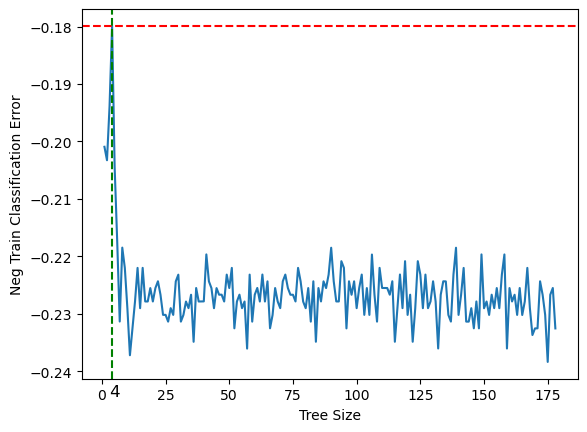

In [25]:
mean_test_score=grid.cv_results_['mean_test_score']
plt.plot(range(1,179),mean_test_score)
plt.axhline(max(mean_test_score),c='r',ls='--')
plt.axvline(np.argmax(mean_test_score)+1,c='g',ls='--')
plt.text(np.argmax(mean_test_score),min(mean_test_score)-0.006,np.argmax(mean_test_score)+1,fontsize=12)
plt.xlabel('Tree Size')
plt.ylabel('Neg Train Classification Error');

In [26]:
kfold=skm.KFold(10,shuffle=True)
dtc=DecisionTreeClassifier()
param_grid={'max_depth':range(1,179)}
grid=skm.GridSearchCV(dtc,param_grid,refit=True,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 179)}, scoring='accuracy')

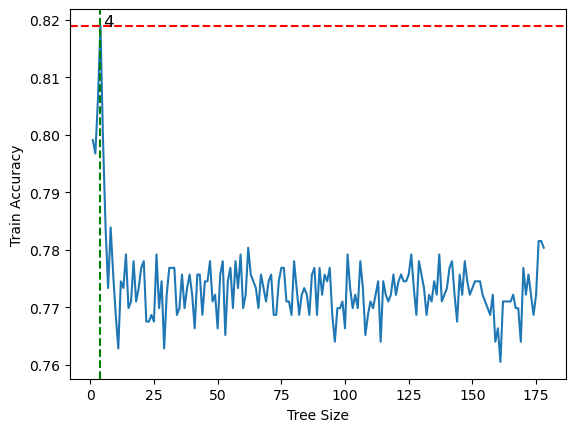

In [27]:
mean_test_score=grid.cv_results_['mean_test_score']
plt.plot(range(1,179),mean_test_score)
plt.axhline(max(mean_test_score),c='r',ls='--')
plt.axvline(np.argmax(mean_test_score)+1,c='g',ls='--')
plt.text(np.argmax(mean_test_score)+2,max(mean_test_score),np.argmax(mean_test_score)+1,fontsize=12)
plt.xlabel('Tree Size')
plt.ylabel('Train Accuracy');

In [28]:
grid.best_estimator_.tree_.n_leaves

16

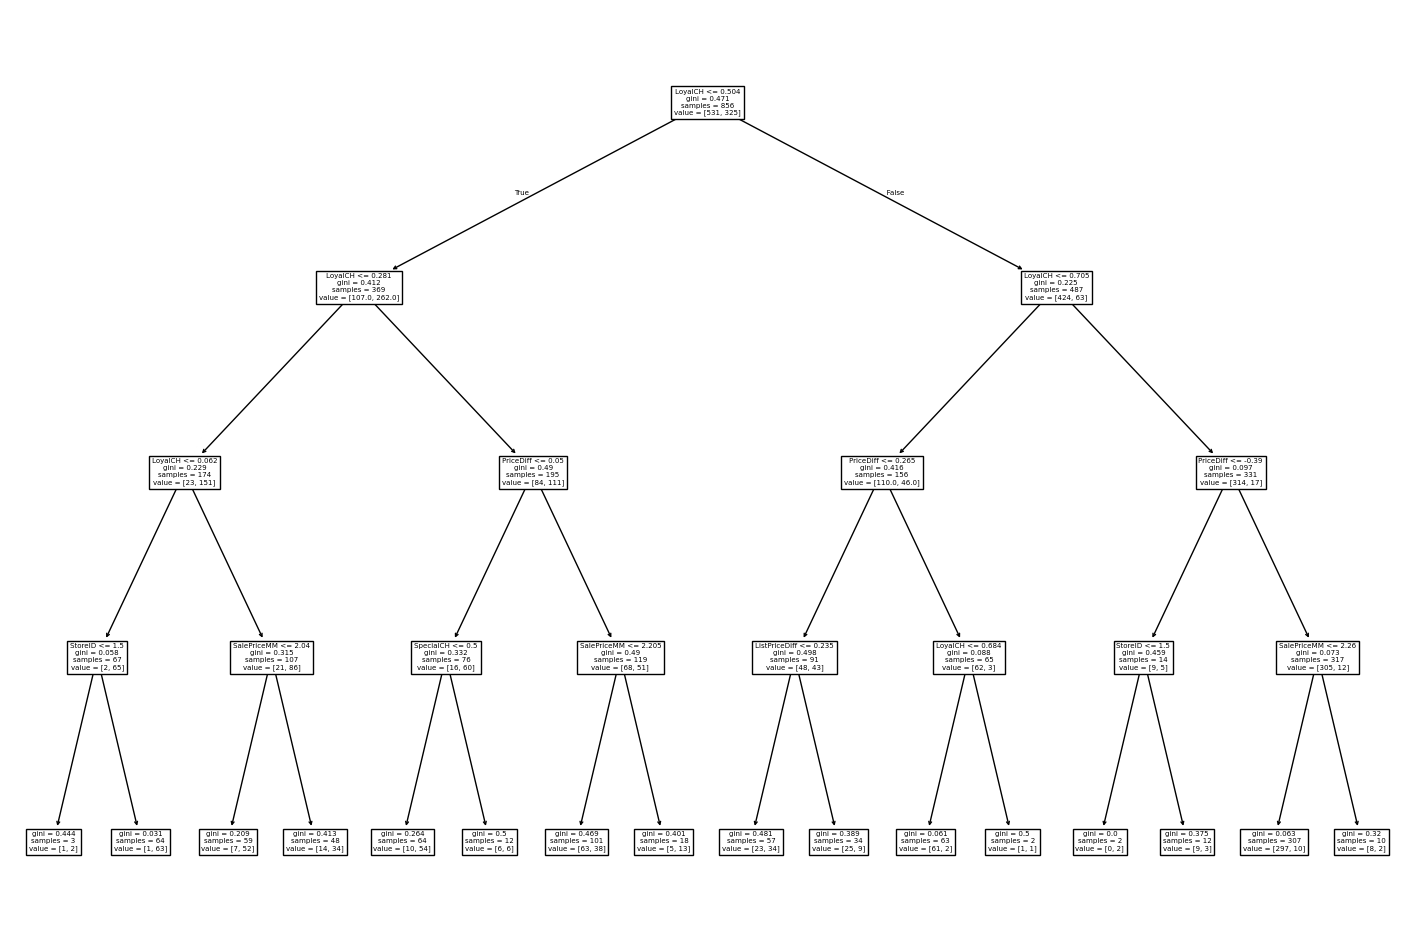

In [29]:
plt.figure(figsize=(18,12))
plot_tree(grid.best_estimator_,feature_names=X_train.columns);

In [30]:
confusion_table(grid.best_estimator_.predict(X_train),y_train)

Truth       CH   MM
Predicted          
CH         470   71
MM          61  254

In [31]:
confusion_table(grid.best_estimator_.predict(X_test),y_test)

Truth       CH  MM
Predicted         
CH         101  23
MM          21  69

## I-K (Unpruned Tree)

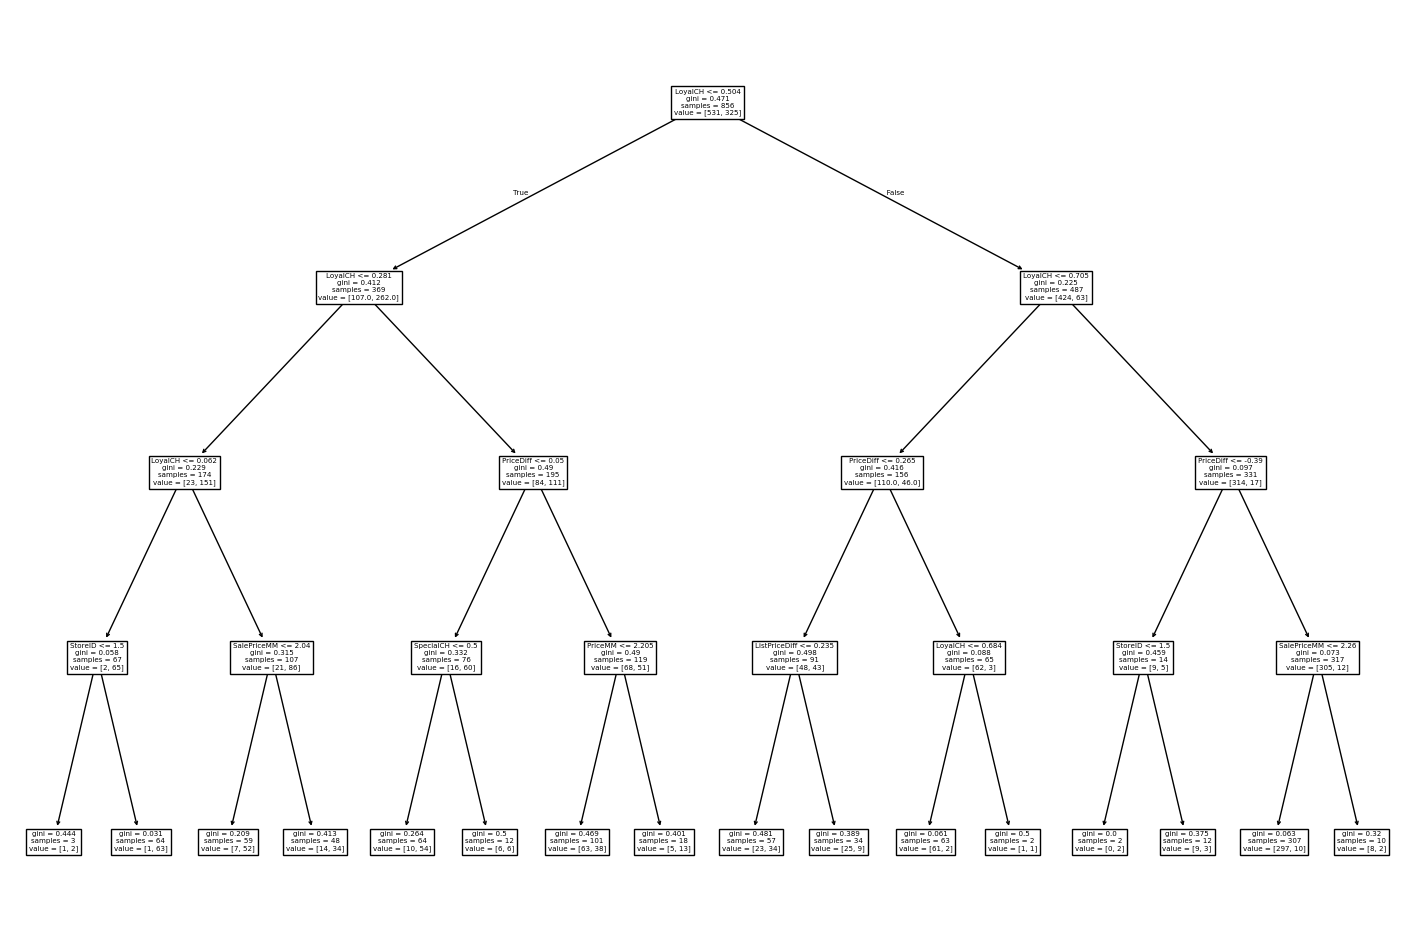

In [36]:
ccp_path=dtc.cost_complexity_pruning_path(X_train,y_train)
dtc=DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train,y_train)
plt.figure(figsize=(18,12))
plot_tree(dtc,feature_names=X_train.columns);

In [37]:
confusion_table(dtc.predict(X_train),y_train)

Truth       CH   MM
Predicted          
CH         470   71
MM          61  254

In [38]:
confusion_table(dtc.predict(X_test),y_test)

Truth       CH  MM
Predicted         
CH         101  23
MM          21  69

In [39]:
classification_error=1-accuracy_score(y_train,dtc.predict(X_train))
print(f'classification_error = {classification_error}')

classification_error = 0.15420560747663548


In [40]:
classification_error=1-accuracy_score(y_test,dtc.predict(X_test))
print(f'classification_error = {classification_error}')

classification_error = 0.20560747663551404


# Question 10

In [4]:
Hitters=load_data('Hitters')
# Hitters=pd.get_dummies(Hitters)
Hitters.dropna(inplace=True)
Hitters[:2]

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A

In [5]:
Hitters.duplicated().sum()

0

In [6]:
Hitters=pd.get_dummies(Hitters).astype(float)
Hitters['Salary']=np.log(Hitters['Salary'])
Hitters[:2]

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat  CHits  CHmRun  ...  \
1  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0  835.0    69.0  ...   
2  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0  457.0    63.0  ...   

   PutOuts  Assists  Errors    Salary  League_A  League_N  Division_E  \
1    632.0     43.0    10.0  6.163315       0.0       1.0         0.0   
2    880.0     82.0    14.0  6.173786       1.0       0.0         0.0   

   Division_W  NewLeague_A  NewLeague_N  
1         1.0          0.0          1.0  
2         1.0          1.0          0.0  

[2 rows x 23 columns]

In [7]:
X=Hitters.drop('Salary',axis=1)
y=Hitters['Salary']

In [8]:
X_train,X_test,y_train,y_test=skm.train_test_split(X,y,train_size=200,shuffle=False)

## C-D (Boosting)

In [82]:
MSE=[]
for lambdas in np.logspace(-3,0,100):
    gbr=GradientBoostingRegressor(n_estimators=1000,learning_rate=lambdas)
    gbr.fit(X_train,y_train)
    mse_train=np.mean((gbr.predict(X_train)-y_train)**2)
    mse_test=np.mean((gbr.predict(X_test)-y_test)**2)
    MSE.append([lambdas,mse_train,mse_test])

In [100]:
df[df['MSE_Test']==df['MSE_Test'].min()].index[0]

0.004037017258596553

For Min Test MSE, lambda = 0.004037017258596553
Min Test MSE = 0.20472575989985442


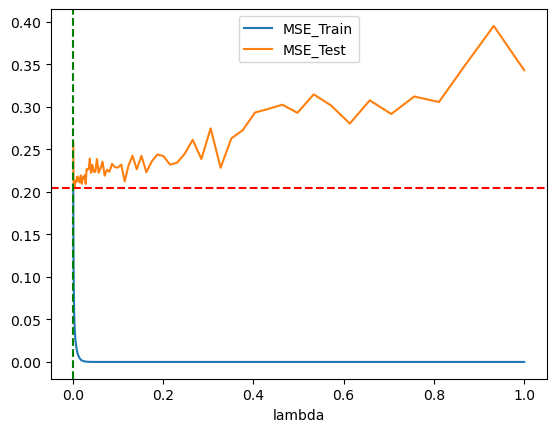

In [103]:
df=pd.DataFrame(MSE,columns=['lambda','MSE_Train','MSE_Test']).set_index('lambda')
df.plot()
plt.axhline(df['MSE_Test'].min(),c='r',ls='--')
plt.axvline(np.argmin(df['MSE_Test'].min()),c='g',ls='--');
print(f'For Min Test MSE, lambda = {df[df['MSE_Test']==df['MSE_Test'].min()].index[0]}'+\
     f'\nMin Test MSE = {df['MSE_Test'].min()}')
# plt.text(np.argmin(df['MSE_Test'].min()),df['MSE_Test'].min()-0.02,np.argmin(df['MSE_Test'].min()),fontsize=12);

## E (OLS,Ridge,Lasso,PCA)

In [53]:
X_train_=X_train.drop(['League_A','Division_E','NewLeague_A'],axis=1)
X_test_=X_test.drop(['League_A','Division_E','NewLeague_A'],axis=1)

In [54]:
X_train_=sm.add_constant(X_train_)
res=sm.OLS(y_train,X_train_).fit()
mse=np.mean((y_test-res.predict(sm.add_constant(X_test_)))**2)
print(f'MSE for sm.OLS = {mse}');

MSE for sm.OLS = 0.4917959375454955


In [57]:
X_train_=X_train.drop(['League_A','Division_E','NewLeague_A'],axis=1)
X_test_=X_test.drop(['League_A','Division_E','NewLeague_A'],axis=1)

In [58]:
X_train_=MS(X_train_.columns).fit_transform(X_train_)
res=sm.OLS(y_train,X_train_).fit()
mse=np.mean((y_test-res.predict(sm.add_constant(X_test_)))**2)
print(f'MSE for sm.OLS = {mse}');

MSE for sm.OLS = 0.4917959375454955


### Fitting Ridge

In [32]:
import warnings
X_train_arr=X_train.to_numpy()
X_test_arr=X_test.to_numpy()
scaler=StandardScaler()
ridge=ElasticNet(l1_ratio=0)
pipe=Pipeline([('scaler',scaler),('ridge',ridge)])
kfold=skm.KFold(10,shuffle=True,random_state=12)
lambdas=np.logspace(-3,8,100)/y_train.std()
param_grid={'ridge__alpha':lambdas}
grid=skm.GridSearchCV(pipe,param_grid=param_grid,cv=kfold,scoring='neg_mean_squared_error')
with warnings.catch_warnings(action='ignore'):
    grid.fit(X_train,y_train)

In [33]:
grid.best_params_,grid.best_score_,grid.cv_results_

({'ridge__alpha': 0.39300861217125055},
 -0.39793755475576936,
 {'mean_fit_time': array([0.02448092, 0.02317781, 0.02275133, 0.02317798, 0.02161584,
         0.02079277, 0.02235079, 0.01918335, 0.02681451, 0.02495525,
         0.02070441, 0.02695396, 0.02539351, 0.02226708, 0.02372565,
         0.02695372, 0.02458031, 0.02161551, 0.02942955, 0.02004652,
         0.0290163 , 0.02444837, 0.02336128, 0.02647133, 0.03255289,
         0.02439311, 0.02460988, 0.02493348, 0.02415392, 0.02174551,
         0.02795744, 0.02151911, 0.023804  , 0.02534039, 0.02298725,
         0.01887848, 0.02351396, 0.02539291, 0.02269547, 0.03259969,
         0.03039505, 0.02925911, 0.03018939, 0.02895255, 0.0253772 ,
         0.02655048, 0.0255635 , 0.0251735 , 0.02662551, 0.02919819,
         0.02274678, 0.03127606, 0.02846575, 0.02455854, 0.02478199,
         0.02615261, 0.02415936, 0.02578747, 0.02093098, 0.02497578,
         0.0237648 , 0.02238383, 0.02518625, 0.02275243, 0.02577405,
         0.02005398, 0.

In [35]:
best_=grid.best_estimator_
mse=np.mean((y_test-best_.predict(X_test))**2)
print(f'MSE for Ridge (CV) = {mse}');

MSE for Ridge (CV) = 0.4499528667003236


In [37]:
ridge=Ridge()
grid=skm.GridSearchCV(pipe,param_grid=param_grid,cv=kfold,scoring='neg_mean_squared_error')
with warnings.catch_warnings(action='ignore'):
    grid.fit(X_train,y_train)

In [39]:
print(grid.best_params_,grid.best_score_)
best_=grid.best_estimator_
mse=np.mean((y_test-best_.predict(X_test))**2)
print(f'MSE for Ridge (CV) = {mse}');

{'ridge__alpha': 0.39300861217125055} -0.39793755475576936
MSE for Ridge (CV) = 0.4499528667003236


### Lasso

In [40]:
lasso=ElasticNet(l1_ratio=1)
pipe=Pipeline([('scaler',scaler),('lasso',lasso)])
param_grid={'lasso__alpha':lambdas}
grid=skm.GridSearchCV(pipe,param_grid=param_grid,cv=kfold,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=12, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', ElasticNet(l1_ratio=1))]),
             param_grid={'lasso__alpha': array([1.09356981e-03, 1.41239972e-03, 1.82418439e-03, 2.35602473e-03,
       3.04292295e-03, 3.93008612e-03, 5.07590141e-03, 6.55577877e-03,
       8.46711388e-03, 1.09356981e-02, 1.41239972e-0...
       3.04292295e+05, 3.93008612e+05, 5.07590141e+05, 6.55577877e+05,
       8.46711388e+05, 1.09356981e+06, 1.41239972e+06, 1.82418439e+06,
       2.35602473e+06, 3.04292295e+06, 3.93008612e+06, 5.07590141e+06,
       6.55577877e+06, 8.46711388e+06, 1.09356981e+07, 1.41239972e+07,
       1.82418439e+07, 2.35602473e+07, 3.04292295e+07, 3.93008612e+07,
       5.07590141e+07, 6.55577877e+07, 8.46711388e+07, 1.09356981e+08])},
             scoring='neg_mean_squared_error')

In [41]:
print(grid.best_params_,grid.best_score_)
best_=grid.best_estimator_
mse=np.mean((y_test-best_.predict(X_test))**2)
print(f'MSE for Lasso (CV) = {mse}');

{'lasso__alpha': 0.030429229538511134} -0.4007192779519316
MSE for Lasso (CV) = 0.4573839730864981


### PCA

In [43]:
pca=PCA(n_components=2)
lin_reg=LinearRegression()
pipe=Pipeline([('scaler',scaler),('pca',pca),('lin_reg',lin_reg)])
param_grid={'pca__n_components':range(1,len(X_train.columns)+1)}
grid=skm.GridSearchCV(pipe,param_grid=param_grid,cv=kfold,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=12, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('lin_reg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 23)},
             scoring='neg_mean_squared_error')

In [44]:
print(grid.best_params_,grid.best_score_)
best_=grid.best_estimator_
mse=np.mean((y_test-best_.predict(X_test))**2)
print(f'MSE for PCA (CV) = {mse}');

{'pca__n_components': 7} -0.3993348051983171
MSE for PCA (CV) = 0.48063208816159697


## F (Boosting)

In [49]:
gbr=GradientBoostingRegressor(learning_rate=0.004037017258596553)
gbr.fit(X_test,y_test)
pd.DataFrame(gbr.feature_importances_,index=X_train.columns,columns=['feature_importances']).sort_values(
    by='feature_importances',ascending=False)

feature_importances
CRuns                   0.664134
HmRun                   0.059853
Years                   0.051163
AtBat                   0.046046
CRBI                    0.034852
CHits                   0.032681
Hits                    0.023964
CWalks                  0.022705
PutOuts                 0.014662
Runs                    0.011070
Walks                   0.010529
Assists                 0.010037
RBI                     0.009911
CAtBat                  0.008318
League_N                0.000037
NewLeague_N             0.000037
CHmRun                  0.000000
Errors                  0.000000
League_A                0.000000
Division_E              0.000000
Division_W              0.000000
NewLeague_A             0.000000

## G (bagging)

In [61]:
rfr=RandomForestRegressor(n_estimators=1000,max_features=len(X_train.columns))
rfr.fit(X_train,y_train)
print(f'MSE = {np.mean((y_test-rfr.predict(X_test))**2)}')

MSE = 0.22765091591324974


# Question 11

In [64]:
Caravan=load_data('Caravan')
Caravan[:2]

MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0       33         1        3         2         8       0       5       1   
1       37         1        2         2         8       1       4       1   

   MGODGE  MRELGE  ...  APERSONG  AGEZONG  AWAOREG  ABRAND  AZEILPL  APLEZIER  \
0       3       7  ...         0        0        0       1        0         0   
1       4       6  ...         0        0        0       1        0         0   

   AFIETS  AINBOED  ABYSTAND  Purchase  
0       0        0         0        No  
1       0        0         0        No  

[2 rows x 86 columns]

In [65]:
X=Caravan.drop('Purchase',axis=1)
y=Caravan['Purchase']

In [67]:
X_train,X_test,y_train,y_test=skm.train_test_split(X,y,train_size=1000,shuffle=False)

## B (Boosting)

In [70]:
gbr=GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01).fit(X_train,y_train)

In [72]:
pd.DataFrame(gbr.feature_importances_,index=X_test.columns,columns=['feature_importances']).sort_values(
    by='feature_importances',ascending=False)

feature_importances
PPERSAUT             0.075477
MOSTYPE              0.061666
ABRAND               0.056919
MGODGE               0.054903
MKOOPKLA             0.049214
...                       ...
PVRAAUT              0.000000
PINBOED              0.000000
PWERKT               0.000000
AINBOED              0.000000
PPERSONG             0.000000

[85 rows x 1 columns]

## C

### Boosting

In [74]:
gbr.classes_

array(['No', 'Yes'], dtype=object)

In [75]:
pred=np.where(gbr.predict_proba(X_test)[:,1] >0.2,'Yes','No')

In [80]:
confusion_table(pred,y_test)

Truth        No  Yes
Predicted           
No         4334  251
Yes         199   38

In [84]:
f'{38*100/(38+199)} %'

'16.033755274261605 %'

### Logistic Regression

In [95]:
log_reg=LogisticRegression(C=1e-30,solver='liblinear').fit(X_train,y_train)
pred=np.where(log_reg.predict_proba(X_test)[:,1] >0.2,'Yes','No')
print(f'classes : {log_reg.classes_}')
print(f'{289*100/(289+4533)} %')
confusion_table(pred,y_test)

classes : ['No' 'Yes']
5.993363749481543 %


Truth        No  Yes
Predicted           
No            0    0
Yes        4533  289

### sm.GLM

In [124]:
X_train_=sm.add_constant(X_train)
y_train_=pd.get_dummies(y_train,drop_first=True,prefix='Purchase').astype(int)
res=sm.GLM(y_train_,X_train_,family=sm.families.Binomial()).fit()
pred=np.where(res.predict(sm.add_constant(X_test)) > 0.2, 'Yes','No')
print(f'{58*100/(58+349)} %')
confusion_table(pred,y_test)

14.25061425061425 %


Truth        No  Yes
Predicted           
No         4184  231
Yes         349   58

### Logit

In [146]:
y_test_=pd.get_dummies(y_test,drop_first=True,prefix='Purchase').astype(int)
y_mod=y_train.map({'Yes':1,'No':0})
X_test_=sm.add_constant(X_test)
res=sm.Logit(y_mod,X_train_).fit()

C:\anaconda3\envs\ISLP\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\anaconda3\envs\ISLP\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

### KNN

In [107]:
knn_n=KNeighborsClassifier(n_neighbors=200).fit(X_train,y_train)
accuracy_score(y_test,knn_n.predict(X_test)),knn_n.score(X_test,y_test)
knn_n.predict_proba(X_test),knn_n.classes_

(array([[0.92 , 0.08 ],
        [0.96 , 0.04 ],
        [0.92 , 0.08 ],
        ...,
        [0.945, 0.055],
        [0.91 , 0.09 ],
        [0.94 , 0.06 ]]),
 array(['No', 'Yes'], dtype=object))

In [108]:
'''Find optimum Neighbours which will give least train Classification Error'''
classification_error=[]
for n in range(1,501):
    knn_n=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    pred=np.where(knn_n.predict_proba(X_test)[:,1] >0.2,'Yes','No')
    classification_error.append(1-accuracy_score(y_test,pred))

In [110]:
print(f'Minimum Test classification_error = {min(classification_error)} occured for n = {classification_error.index(min(classification_error))}')

Minimum Test classification_error = 0.059933637494815395 occured for n = 79


In [112]:
knn_n=KNeighborsClassifier(n_neighbors=79).fit(X_train,y_train)
pred=np.where(knn_n.predict_proba(X_test)[:,1] >0.2,'Yes','No')
print(f'0 %')
confusion_table(pred,y_test)

0 %


Truth        No  Yes
Predicted           
No         4532  289
Yes           1    0

In [139]:
knn_n=KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)
pred=np.where(knn_n.predict_proba(X_test)[:,1] >0.2,'Yes','No')
print(f'{52*100/(58+402)} %')
confusion_table(pred,y_test)

11.304347826086957 %


Truth        No  Yes
Predicted           
No         4131  237
Yes         402   52

# Question 12

In [4]:
diabetes=pd.read_csv('diabetes.csv')
diabetes['Pregnancies']=np.clip(diabetes['Pregnancies'],1,12)
diabetes['SkinThickness']=np.clip(diabetes['SkinThickness'],10,63)
diabetes.replace({'BMI':{0:19}},inplace=True)
diabetes['Outcome']=diabetes['Outcome'].astype('category')
diabetes['BloodPressure']=np.where(diabetes['BloodPressure'] <40 ,40 ,diabetes['BloodPressure'])
diabetes['Pregnancies']=diabetes['Pregnancies'].astype('category')

## Classification Type

In [56]:
X=diabetes.drop(columns='Outcome')
X=pd.get_dummies(X,drop_first=True).astype(float)
y=diabetes['Outcome']
X_train,X_test,y_train,y_test=skm.train_test_split(X,y,test_size=0.20,random_state=1)

In [57]:
y.value_counts(),y_train.value_counts(),y_test.value_counts()

(Outcome
 0    500
 1    268
 Name: count, dtype: int64,
 Outcome
 0    401
 1    213
 Name: count, dtype: int64,
 Outcome
 0    99
 1    55
 Name: count, dtype: int64)

### Logit

In [58]:
X_train_=sm.add_constant(X_train)
res=sm.Logit(y_train,X_train_).fit()
pred=np.where(res.predict(X_train_) >=0.5,1,0)
train=1-accuracy_score(y_train,pred)
pred=np.where(res.predict(sm.add_constant(X_test)) >=0.5,1,0)
test=1-accuracy_score(y_test,pred);
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['Classification Error'])

Optimization terminated successfully.
         Current function value: 0.460724
         Iterations 6


Classification Error
Train              0.224756
Test               0.233766

### sm.GLM

In [59]:
X_train_=sm.add_constant(X_train)
res=sm.GLM(y_train,X_train_,family=sm.families.Binomial()).fit()
pred=np.where(res.predict(X_train_) >=0.5,1,0)
train=1-accuracy_score(y_train,pred)
pred=np.where(res.predict(sm.add_constant(X_test)) >=0.5,1,0)
test=1-accuracy_score(y_test,pred);
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['Classification Error'])

Classification Error
Train              0.224756
Test               0.233766

### Logistic Regression

In [60]:
log_reg=LogisticRegression(C=1e-30,solver='liblinear').fit(X_train,y_train)
train=1-accuracy_score(y_train,log_reg.predict(X_train))
test=1-accuracy_score(y_test,log_reg.predict(X_test))
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['Classification Error'])

Classification Error
Train              0.346906
Test               0.357143

### LDA

In [61]:
lda=LinearDiscriminantAnalysis(store_covariance=True).fit(X_train,y_train)
train=1-accuracy_score(y_train,lda.predict(X_train))
test=1-accuracy_score(y_test,lda.predict(X_test))
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['Classification Error'])

Classification Error
Train              0.228013
Test               0.246753

### QDA

In [62]:
qda=QuadraticDiscriminantAnalysis(store_covariance=True).fit(X_train,y_train)
train=1-accuracy_score(y_train,qda.predict(X_train))
test=1-accuracy_score(y_test,qda.predict(X_test))
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['Classification Error'])

Classification Error
Train              0.260586
Test               0.279221

### Naive Bayes

In [63]:
gb=GaussianNB().fit(X_train,y_train)
train=1-accuracy_score(y_train,gb.predict(X_train))
test=1-accuracy_score(y_test,gb.predict(X_test))
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['Classification Error'])

Classification Error
Train              0.286645
Test               0.272727

### KNN

In [64]:
knn=KNeighborsClassifier(n_neighbors=2)
param_grid={'n_neighbors':range(1,500,10)}
grid=skm.GridSearchCV(knn,param_grid,scoring='accuracy')
grid.fit(X_train,y_train)
best=grid.best_estimator_
train=1-accuracy_score(y_train,best.predict(X_train))
test=1-accuracy_score(y_test,best.predict(X_test))
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['Classification Error'])

Classification Error
Train              0.231270
Test               0.227273

### Ridge

In [65]:
log_reg=LogisticRegression(penalty='l2',solver='liblinear').fit(X_train,y_train)
train=1-accuracy_score(y_train,log_reg.predict(X_train))
test=1-accuracy_score(y_test,log_reg.predict(X_test))
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['Classification Error'])

Classification Error
Train              0.237785
Test               0.240260

### Lasso

In [66]:
log_reg=LogisticRegression(penalty='l1',solver='liblinear',C=1).fit(X_train,y_train)
train=1-accuracy_score(y_train,log_reg.predict(X_train))
test=1-accuracy_score(y_test,log_reg.predict(X_test))
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['Classification Error'])

Classification Error
Train              0.223127
Test               0.233766

### PCA

In [67]:
scaler=StandardScaler()
log_reg=LogisticRegression(C=1e-30,solver='liblinear')
pca=PCA(n_components=0.20)
pipe=Pipeline([('scaler',scaler),('pca',pca),('log_reg',log_reg)])
param_grid={'pca__n_components':range(1,19,1)}
grid=skm.GridSearchCV(pipe,param_grid=param_grid,scoring='accuracy')
grid.fit(X_train,y_train)
best=grid.best_estimator_
train=1-accuracy_score(y_train,best.predict(X_train))
test=1-accuracy_score(y_test,best.predict(X_test))
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['Classification Error'])

Classification Error
Train              0.346906
Test               0.357143

### Classification Tree

In [68]:
X=diabetes.drop(columns='Outcome')
X=pd.get_dummies(X,drop_first=False).astype(float)
y=diabetes['Outcome']
X_train,X_test,y_train,y_test=skm.train_test_split(X,y,test_size=0.20,random_state=1)

### Decision Tree

In [69]:
dtc=DecisionTreeClassifier(max_depth=1)
param_grid={'max_depth':range(1,18)}
grid=skm.GridSearchCV(dtc,param_grid,scoring='accuracy')
grid.fit(X_train,y_train)
best=grid.best_estimator_
train=1-accuracy_score(y_train,best.predict(X_train))
test=1-accuracy_score(y_test,best.predict(X_test))
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['Classification Error'])

Classification Error
Train              0.226384
Test               0.214286

In [70]:
X.shape

(768, 19)

In [71]:
best.max_depth
dtc=DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)

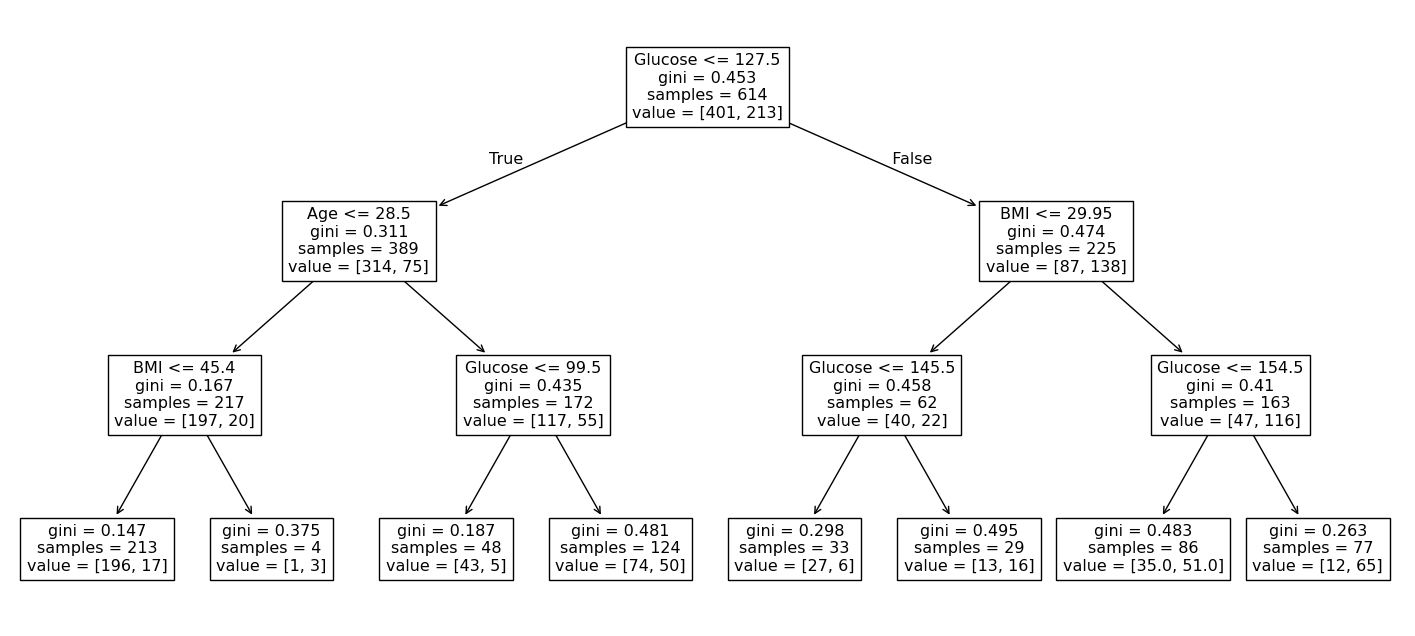

In [72]:
plt.figure(figsize=(18,8))
plot_tree(dtc,feature_names=X_train.columns);

### Unpruned Decision Tree

In [73]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
train=1-accuracy_score(y_train,best.predict(X_train))
test=1-accuracy_score(y_test,best.predict(X_test))
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['Classification Error'])

Classification Error
Train              0.226384
Test               0.214286

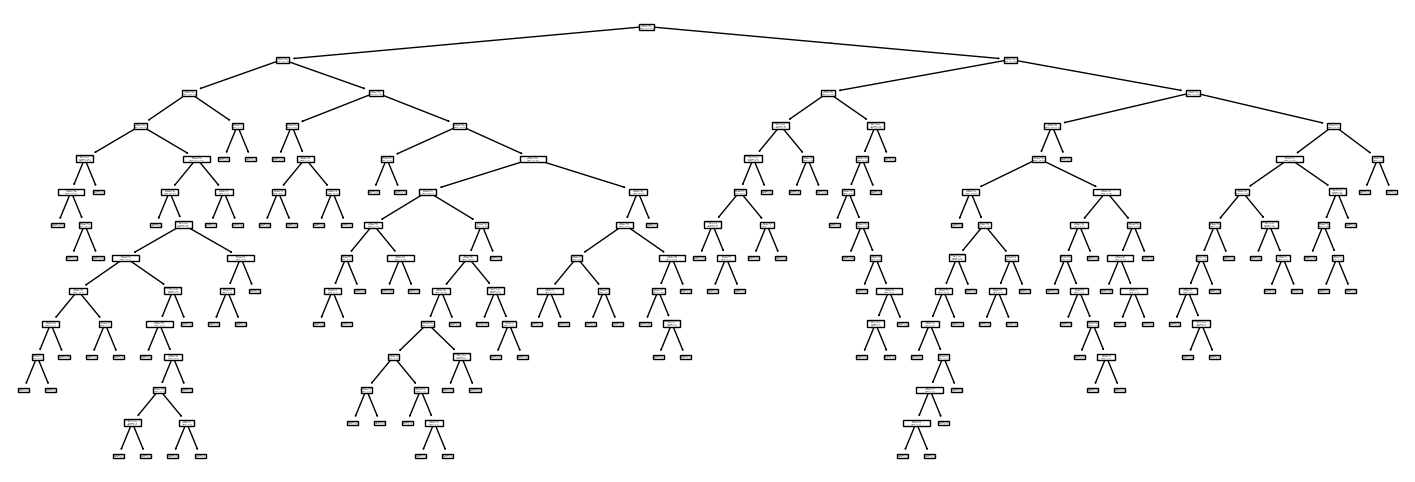

In [74]:
plt.figure(figsize=(18,6))
plot_tree(dtc,feature_names=X_train.columns);

### Pruned Decision Tree

In [75]:
dtc=DecisionTreeClassifier()
# dtc.fit(X_train,y_train)
ccp_path=dtc.cost_complexity_pruning_path(X_train,y_train)
param_grid={'ccp_alpha':ccp_path.ccp_alphas}
grid=skm.GridSearchCV(dtc,param_grid,scoring='accuracy',refit=True)
grid.fit(X_train,y_train)
best=grid.best_estimator_
train=1-accuracy_score(y_train,best.predict(X_train))
test=1-accuracy_score(y_test,best.predict(X_test))
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['Classification Error'])

Classification Error
Train              0.146580
Test               0.220779

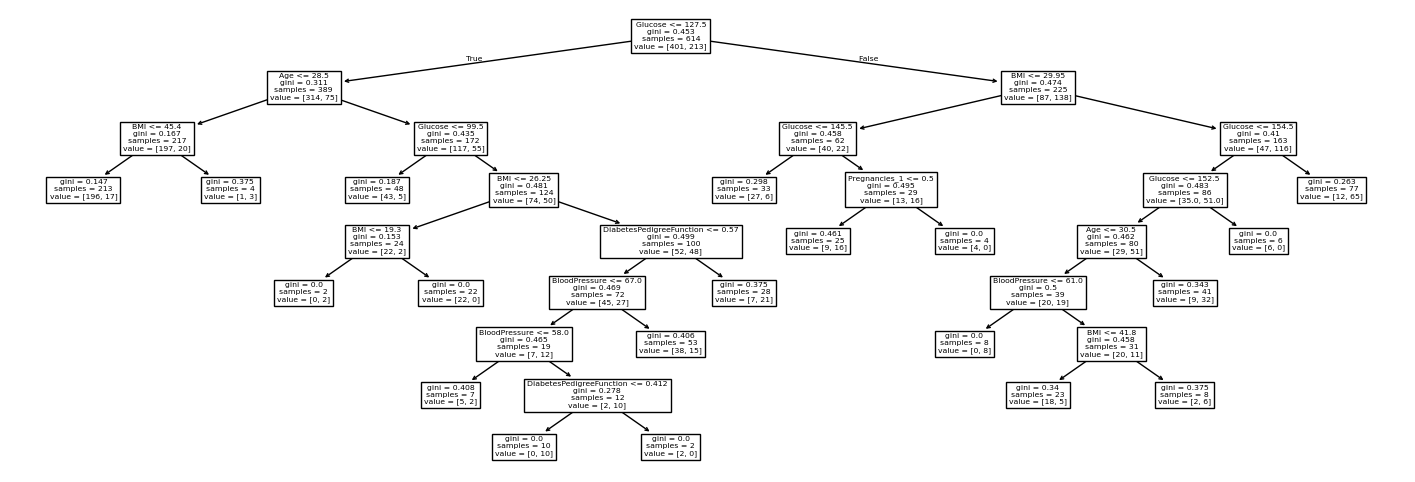

In [76]:
plt.figure(figsize=(18,6))
plot_tree(best,feature_names=X_train.columns);

### Bagging and Random Forest

In [77]:
rfr=RandomForestClassifier(n_estimators=1000,max_features=len(X_train.columns))
rfr.fit(X_train,y_train)
train=1-accuracy_score(y_train,rfr.predict(X_train))
test=1-accuracy_score(y_test,rfr.predict(X_test))
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['Classification Error'])

Classification Error
Train              0.000000
Test               0.194805

In [78]:
rfr=RandomForestClassifier(n_estimators=1000,max_features=len(X_train.columns)//2)
rfr.fit(X_train,y_train)
train=1-accuracy_score(y_train,rfr.predict(X_train))
test=1-accuracy_score(y_test,rfr.predict(X_test))
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['Classification Error'])

Classification Error
Train              0.000000
Test               0.181818

In [79]:
L=int(np.ceil(len(X_train.columns)**0.5))
rfr=RandomForestClassifier(n_estimators=1000,max_features=L)
rfr.fit(X_train,y_train)
train=1-accuracy_score(y_train,rfr.predict(X_train))
test=1-accuracy_score(y_test,rfr.predict(X_test))
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['Classification Error'])

Classification Error
Train              0.000000
Test               0.188312

### Boosting

In [80]:
gbr=GradientBoostingClassifier(learning_rate=1)
param_grid={'learning_rate':np.logspace(-3,-0.001,100)}
grid=skm.GridSearchCV(gbr,param_grid,scoring='accuracy')
grid.fit(X_train,y_train)
best=grid.best_estimator_
train=1-accuracy_score(y_train,best.predict(X_train))
test=1-accuracy_score(y_test,best.predict(X_test))
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['Classification Error'])

Classification Error
Train              0.102606
Test               0.188312

### Logistic GAM

In [128]:
X=diabetes.drop(columns='Outcome')
y=diabetes['Outcome']
X_train,X_test,y_train,y_test=skm.train_test_split(X,y,test_size=0.20,random_state=1)
X_train[:2]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
663           9      145             80             46      130  37.9   
712          10      129             62             36        0  41.2   

     DiabetesPedigreeFunction  Age  
663                     0.637   40  
712                     0.441   38

In [129]:
gam=LogisticGAM(f_gam(0,lam=0)+s_gam(1,n_splines=5)+s_gam(2,penalties='l2')+s_gam(3,n_splines=5)\
             +s_gam(4,n_splines=7,spline_order=0)+s_gam(5,n_splines=5,lam=1)\
              +s_gam(6,n_splines=4)+s_gam(7,lam=0))
gam.fit(X_train,y_train)
train=1-accuracy_score(y_train,gam.predict(X_train))
test=1-accuracy_score(y_test,gam.predict(X_test))
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['Classification Error'])

Classification Error
Train              0.213355
Test               0.220779

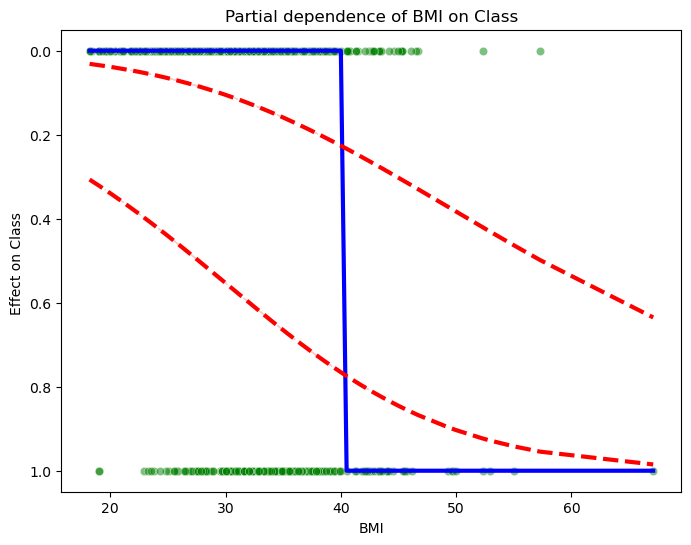

In [132]:
X_arr=np.asarray(X_train)
X_pred=X_arr.copy()
X_mean=X_arr.mean(axis=0)[np.newaxis,:]
X_pred[:,:]=X_mean[:,:]
X_pred[:,5]=X_arr[:,5]
pred=gam.predict(X_pred)
conf_int=gam.confidence_intervals(X_pred)
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x=X_arr[:,5],y=y_train,ax=ax,color='green',alpha=0.5)
sns.lineplot(ax=ax,x=X_arr[:,5],y=pred,color='blue',linewidth=3)
sns.lineplot(ax=ax,x=X_arr[:,5],y=conf_int[:,0],color='red',linestyle='--',linewidth=3)
sns.lineplot(ax=ax,x=X_arr[:,5],y=conf_int[:,1],color='red',linestyle='--',linewidth=3)
ax.set_xlabel('BMI')
ax.set_ylabel('Effect on Class ')
ax.set_title('Partial dependence of BMI on Class');

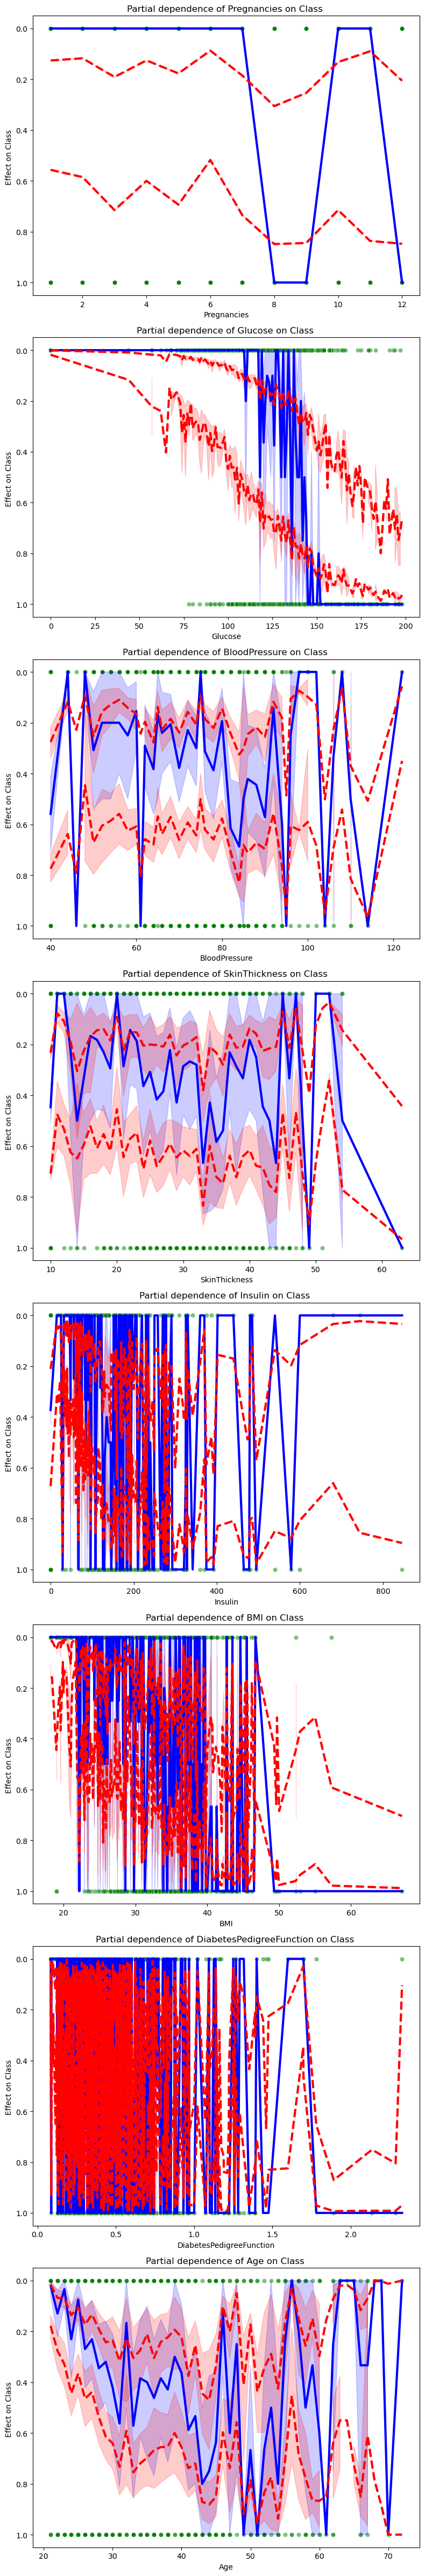

In [131]:
X_arr=np.asarray(X_train)
X_pred=X_arr.copy()
X_mean=X_arr.mean(axis=0)[np.newaxis,:]
X_pred[:,:]=X_mean[:,:]
fig,ax=plt.subplots(ncols=1,nrows=8,figsize=(8,48))
# print(ax)
for i,col in enumerate(X_train.columns):
    # print(i)
    X_pred[:,i]=X_arr[:,i]
    pred=gam.predict(X_pred)
    conf_int=gam.confidence_intervals(X_pred)
    sns.scatterplot(x=X_arr[:,i],y=y_train,ax=ax[i],color='green',alpha=0.5)
    sns.lineplot(ax=ax[i],x=X_arr[:,i],y=pred,color='blue',linewidth=3)
    sns.lineplot(ax=ax[i],x=X_arr[:,i],y=conf_int[:,0],color='red',linestyle='--',linewidth=3)
    sns.lineplot(ax=ax[i],x=X_arr[:,i],y=conf_int[:,1],color='red',linestyle='--',linewidth=3)
    ax[i].set_xlabel(f'{col}')
    ax[i].set_ylabel('Effect on Class ')
    ax[i].set_title(f'Partial dependence of {col} on Class ')
plt.tight_layout();

## Regression Type

In [82]:
X=pd.get_dummies(diabetes,drop_first=True).drop(columns='Glucose').astype(float)
y=diabetes['Glucose']
X_train,X_test,y_train,y_test=skm.train_test_split(X,y,test_size=0.20,random_state=1)

### sm.OLS

In [83]:
X_train_=sm.add_constant(X_train)
res=sm.OLS(y_train,X_train_).fit()
pred=res.predict(sm.add_constant(X_train))
train=np.mean((y_train-pred)**2)
pred=res.predict(sm.add_constant(X_test))
test=np.mean((y_test-pred)**2)
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['MSE'])

MSE
Train  633.852198
Test   747.685069

### sm.GLM

In [84]:
X_train_=sm.add_constant(X_train)
res=sm.GLM(y_train,X_train_,family=sm.families.Gaussian()).fit()
pred=res.predict(sm.add_constant(X_train))
train=np.mean((y_train-pred)**2)
pred=res.predict(sm.add_constant(X_test))
test=np.mean((y_test-pred)**2)
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['MSE'])

MSE
Train  633.852198
Test   747.685069

### Linear Regression

In [85]:
lin_reg=LinearRegression().fit(X_train,y_train)
train=np.mean((y_train-lin_reg.predict(X_train))**2)
test=np.mean((y_test-lin_reg.predict(X_test))**2)
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['MSE'])

MSE
Train  633.852198
Test   747.685069

### Ridge

In [86]:
ridge=Ridge()
pipe=Pipeline([('scaler',scaler),('ridge',ridge)])
kfold=skm.KFold(10,shuffle=True,random_state=12)
lambdas=np.logspace(-3,6,100)/y_train.std()
param_grid={'ridge__alpha':lambdas}
grid=skm.GridSearchCV(pipe,param_grid=param_grid,cv=kfold,scoring='neg_mean_squared_error')
with warnings.catch_warnings(action='ignore'):
    grid.fit(X_train,y_train)
best=grid.best_estimator_
train=np.mean((y_train-best.predict(X_train))**2)
test=np.mean((y_test-best.predict(X_test))**2)
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['MSE'])

MSE
Train  635.719591
Test   751.236676

### Lasso

In [87]:
ridge=Lasso()
pipe=Pipeline([('scaler',scaler),('ridge',ridge)])
kfold=skm.KFold(10,shuffle=True,random_state=12)
lambdas=np.logspace(-3,6,100)/y_train.std()
param_grid={'ridge__alpha':lambdas}
grid=skm.GridSearchCV(pipe,param_grid=param_grid,cv=kfold,scoring='neg_mean_squared_error')
with warnings.catch_warnings(action='ignore'):
    grid.fit(X_train,y_train)
best=grid.best_estimator_
train=np.mean((y_train-best.predict(X_train))**2)
test=np.mean((y_test-best.predict(X_test))**2)
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['MSE'])

MSE
Train  638.614296
Test   755.126611

### PCR

In [88]:
scaler=StandardScaler()
log_reg=LinearRegression()
pca=PCA(n_components=0.20)
pipe=Pipeline([('scaler',scaler),('pca',pca),('log_reg',log_reg)])
param_grid={'pca__n_components':range(1,19,1)}
grid=skm.GridSearchCV(pipe,param_grid=param_grid,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)
best=grid.best_estimator_
train=np.mean((y_train-best.predict(X_train))**2)
test=np.mean((y_test-best.predict(X_test))**2)
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['MSE'])

MSE
Train  636.791228
Test   749.112565

### PLS (Partial Least Squares)

In [89]:
pls=PLSRegression(n_components=1,scale=True)
param_grid={'n_components':range(1,19,1)}
grid=skm.GridSearchCV(pls,param_grid=param_grid,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)
best=grid.best_estimator_
train=np.mean((y_train-best.predict(X_train))**2)
test=np.mean((y_test-best.predict(X_test))**2)
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['MSE'])

MSE
Train  633.918681
Test   745.998618

### GAM

In [105]:
diabetes['Outcome']=diabetes['Outcome'].astype('category')
X=diabetes.drop(columns='Glucose')
y=diabetes['Glucose']
X_train,X_test,y_train,y_test=skm.train_test_split(X,y,test_size=0.20,random_state=1)
X[:2]

Pregnancies  BloodPressure  SkinThickness  Insulin   BMI  \
0           6             72             35        0  33.6   
1           1             66             29        0  26.6   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50       1  
1                     0.351   31       0

In [119]:
gam=LinearGAM(f_gam(0,lam=0)+s_gam(1,n_splines=5)+s_gam(2,penalties='l2')+s_gam(3,n_splines=5)\
             +s_gam(4,n_splines=7,spline_order=0)+s_gam(5,n_splines=5,lam=1)\
              +s_gam(6,n_splines=4)+f_gam(7,lam=0))
gam.fit(X_train,y_train)
train=np.mean((y_train-gam.predict(X_train))**2)
test=np.mean((y_test-gam.predict(X_test))**2)
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['MSE'])

MSE
Train  607.939629
Test   734.108035

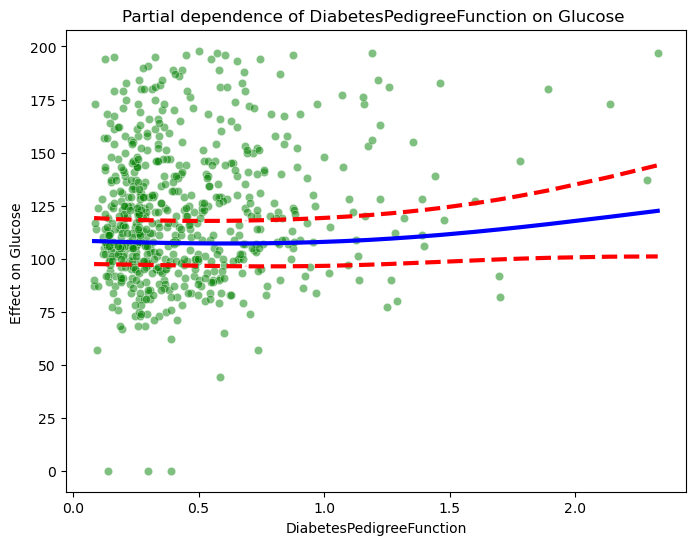

In [121]:
X_arr=np.asarray(X_train)
X_pred=X_arr.copy()
X_mean=X_arr.mean(axis=0)[np.newaxis,:]
X_pred[:,:]=X_mean[:,:]
X_pred[:,5]=X_arr[:,5]
pred=gam.predict(X_pred)
conf_int=gam.confidence_intervals(X_pred)
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x=X_arr[:,5],y=y_train,ax=ax,color='green',alpha=0.5)
sns.lineplot(ax=ax,x=X_arr[:,5],y=pred,color='blue',linewidth=3)
sns.lineplot(ax=ax,x=X_arr[:,5],y=conf_int[:,0],color='red',linestyle='--',linewidth=3)
sns.lineplot(ax=ax,x=X_arr[:,5],y=conf_int[:,1],color='red',linestyle='--',linewidth=3)
ax.set_xlabel('DiabetesPedigreeFunction')
ax.set_ylabel('Effect on Glucose ')
ax.set_title('Partial dependence of DiabetesPedigreeFunction on Glucose ');

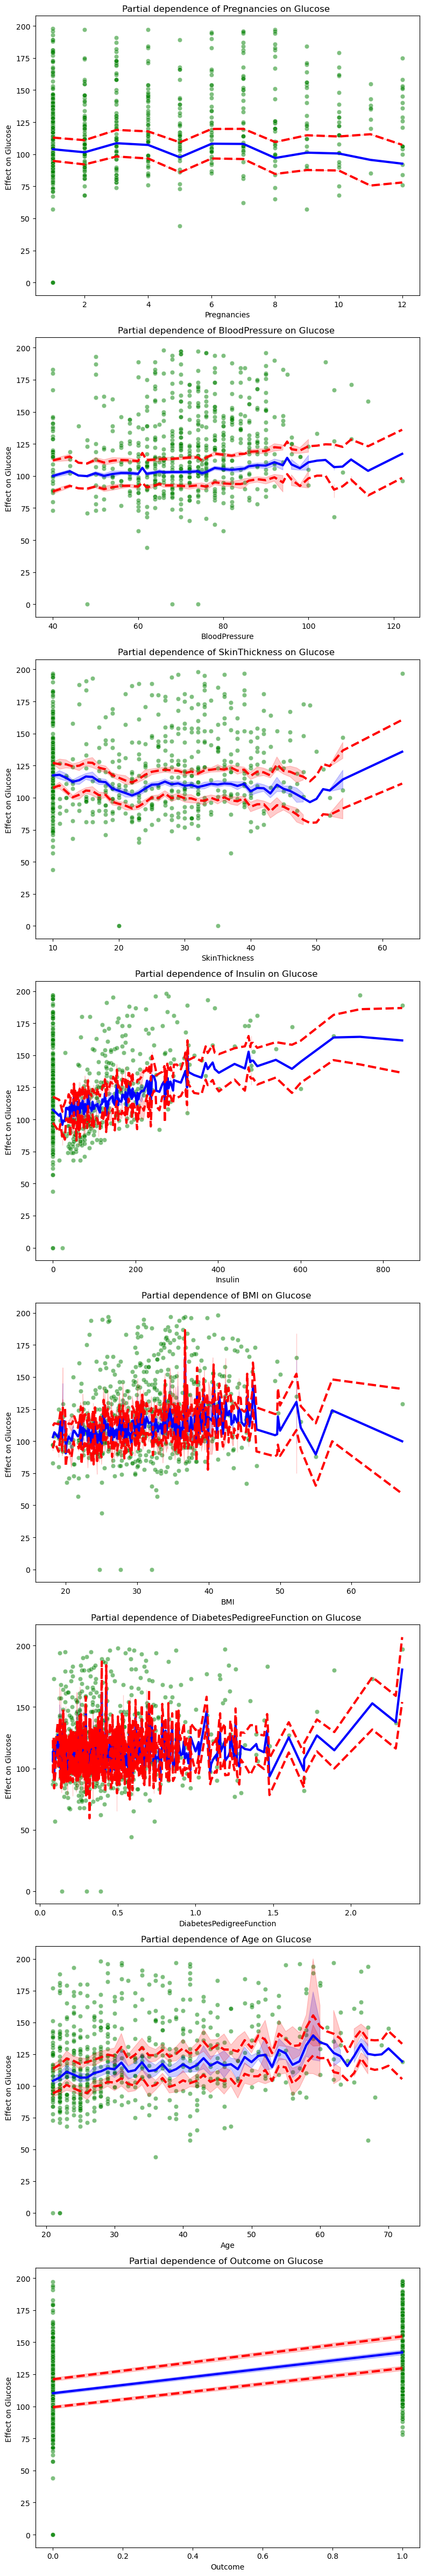

In [122]:
X_arr=np.asarray(X_train)
X_pred=X_arr.copy()
X_mean=X_arr.mean(axis=0)[np.newaxis,:]
X_pred[:,:]=X_mean[:,:]
fig,ax=plt.subplots(ncols=1,nrows=8,figsize=(8,48))
# print(ax)
for i,col in enumerate(X_train.columns):
    # print(i)
    X_pred[:,i]=X_arr[:,i]
    pred=gam.predict(X_pred)
    conf_int=gam.confidence_intervals(X_pred)
    sns.scatterplot(x=X_arr[:,i],y=y_train,ax=ax[i],color='green',alpha=0.5)
    sns.lineplot(ax=ax[i],x=X_arr[:,i],y=pred,color='blue',linewidth=3)
    sns.lineplot(ax=ax[i],x=X_arr[:,i],y=conf_int[:,0],color='red',linestyle='--',linewidth=3)
    sns.lineplot(ax=ax[i],x=X_arr[:,i],y=conf_int[:,1],color='red',linestyle='--',linewidth=3)
    ax[i].set_xlabel(f'{col}')
    ax[i].set_ylabel('Effect on Glucose ')
    ax[i].set_title(f'Partial dependence of {col} on Glucose ')
plt.tight_layout();

## Trees

In [7]:
X=diabetes.drop(columns='Glucose')
X=pd.get_dummies(X,drop_first=False).astype(float)
y=diabetes['Glucose']
X_train,X_test,y_train,y_test=skm.train_test_split(X,y,test_size=0.20,random_state=1)
X_train[:2]

BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  \
663           80.0           46.0    130.0  37.9                     0.637   
712           62.0           36.0      0.0  41.2                     0.441   

      Age  Pregnancies_1  Pregnancies_2  Pregnancies_3  Pregnancies_4  \
663  40.0            0.0            0.0            0.0            0.0   
712  38.0            0.0            0.0            0.0            0.0   

     Pregnancies_5  Pregnancies_6  Pregnancies_7  Pregnancies_8  \
663            0.0            0.0            0.0            0.0   
712            0.0            0.0            0.0            0.0   

     Pregnancies_9  Pregnancies_10  Pregnancies_11  Pregnancies_12  Outcome_0  \
663            1.0             0.0             0.0             0.0        0.0   
712            0.0             1.0             0.0             0.0        0.0   

     Outcome_1  
663        1.0  
712        1.0

### Un-pruned Decisison Tree

In [9]:
dtr=DecisionTreeRegressor().fit(X_train,y_train)
train=np.mean((y_train-dtr.predict(X_train))**2)
test=np.mean((y_test-dtr.predict(X_test))**2)
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['MSE'])

MSE
Train     0.000000
Test   1213.461039

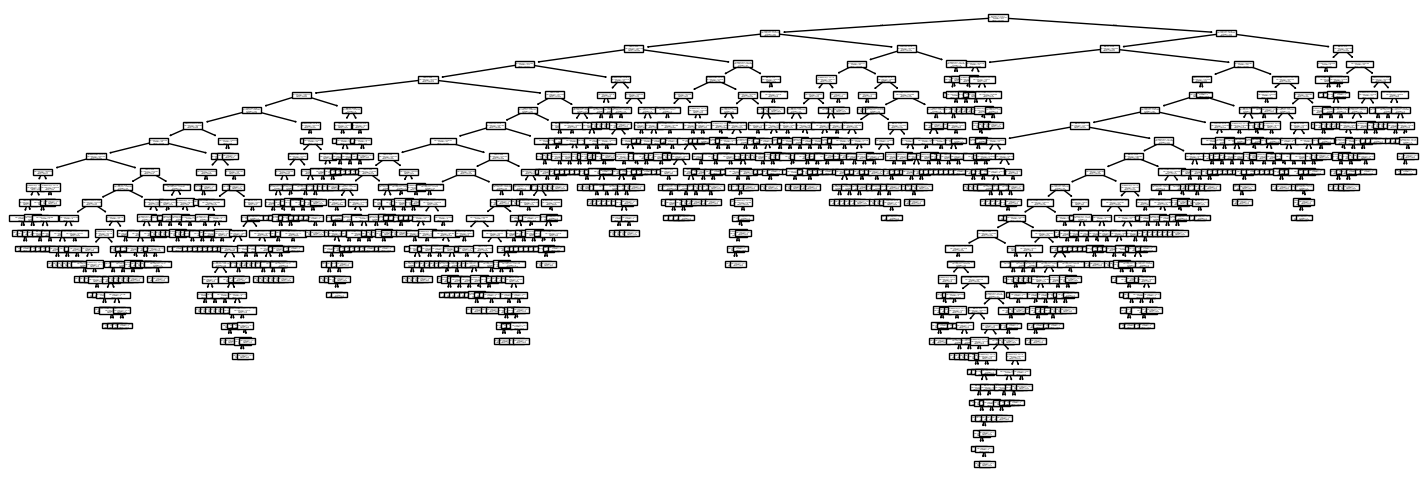

In [10]:
plt.figure(figsize=(18,6))
plot_tree(dtr,feature_names=X_train.columns);

### Pruned Decision Tree

In [15]:
dtr=DecisionTreeRegressor()
ccp_path=dtr.cost_complexity_pruning_path(X_train,y_train)
param_grid={'ccp_alpha':ccp_path.ccp_alphas}
grid=skm.GridSearchCV(dtr,param_grid=param_grid,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)
best=grid.best_estimator_
train=np.mean((y_train-best.predict(X_train))**2)
test=np.mean((y_test-best.predict(X_test))**2)
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['MSE'])

MSE
Train  640.506717
Test   861.781207

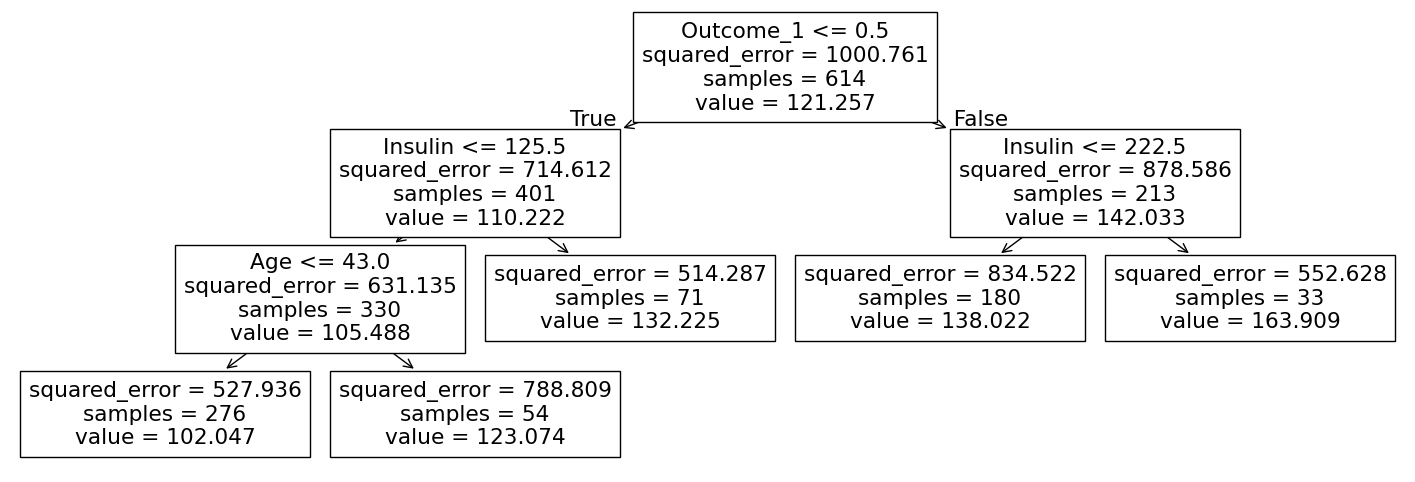

In [16]:
plt.figure(figsize=(18,6))
plot_tree(best,feature_names=X_train.columns);

### CV decision tree

In [18]:
dtr=DecisionTreeRegressor()
param_grid={'max_depth':range(1,len(X.columns)+1)}
grid=skm.GridSearchCV(dtr,param_grid=param_grid,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)
best=grid.best_estimator_
train=np.mean((y_train-best.predict(X_train))**2)
test=np.mean((y_test-best.predict(X_test))**2)
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['MSE'])

MSE
Train  610.159511
Test   842.419498

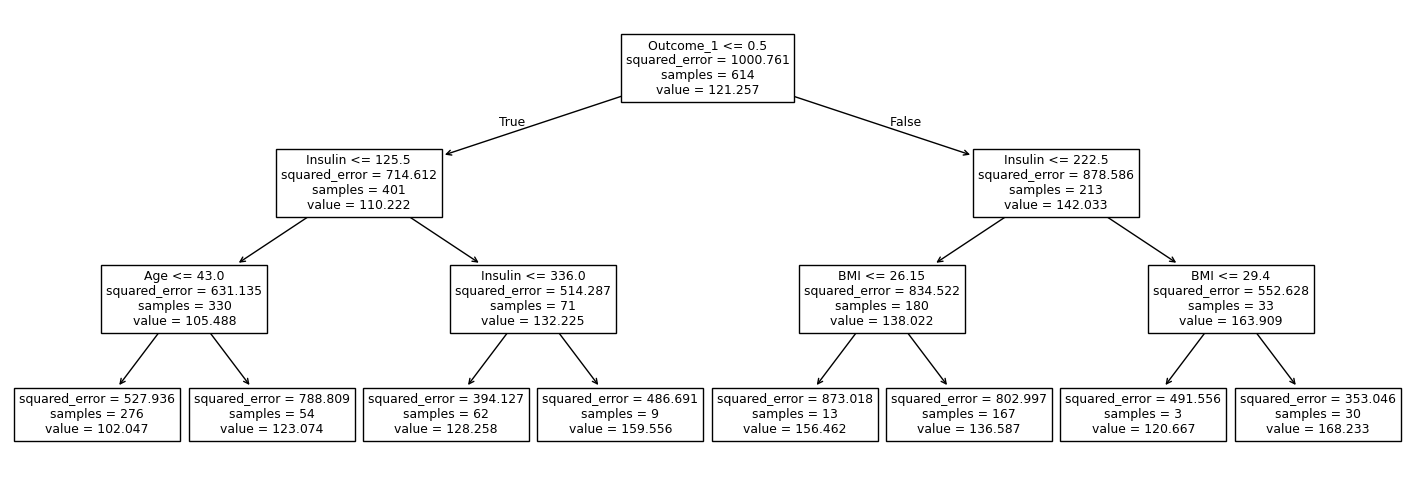

In [19]:
plt.figure(figsize=(18,6))
plot_tree(best,feature_names=X_train.columns);

### Bagging and Random Forest

In [20]:
rfr=RandomForestRegressor(n_estimators=1000,max_features=len(X_train.columns))
rfr.fit(X_train,y_train)
train=np.mean((y_train-rfr.predict(X_train))**2)
test=np.mean((y_test-rfr.predict(X_test))**2)
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['MSE'])

MSE
Train   97.499792
Test   781.615402

In [21]:
rfr=RandomForestRegressor(n_estimators=1000,max_features=len(X_train.columns)//2)
rfr.fit(X_train,y_train)
train=np.mean((y_train-rfr.predict(X_train))**2)
test=np.mean((y_test-rfr.predict(X_test))**2)
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['MSE'])

MSE
Train   95.838147
Test   777.548592

In [24]:
rfr=RandomForestRegressor(n_estimators=1000,max_features=int(((len(X_train.columns))**0.5)//1))
rfr.fit(X_train,y_train)
train=np.mean((y_train-rfr.predict(X_train))**2)
test=np.mean((y_test-rfr.predict(X_test))**2)
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['MSE'])

MSE
Train   94.369778
Test   765.160619

### Boosting

In [25]:
gbr=GradientBoostingRegressor(learning_rate=1)
param_grid={'learning_rate':np.logspace(-3,-0.001,100)}
grid=skm.GridSearchCV(gbr,param_grid,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)
best=grid.best_estimator_
train=np.mean((y_train-best.predict(X_train))**2)
test=np.mean((y_test-best.predict(X_test))**2)
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['MSE'])

MSE
Train  445.390870
Test   773.754296

### BART

In [31]:
bart=BART(num_trees=1000,burnin=100,random_state=1).fit(X_train,y_train)

In [32]:
train=np.mean((y_train-bart.predict(X_train))**2)
test=np.mean((y_test-bart.predict(X_test))**2)
pd.DataFrame(data=[train,test],index=['Train','Test'],columns=['MSE'])

MSE
Train  559.438626
Test   774.829416